Nearest Neighbors 0.7596135450545246
Linear SVM 0.7997895542376124
RBF SVM 0.5501243543141381
Decision Tree 0.8016070403673236
Random Forest 0.7768318347044194
Neural Net 0.7996938970728907
AdaBoost 0.8002678400612205
Naive Bayes 0.7900325234360054
QDA 0.7975894394490147


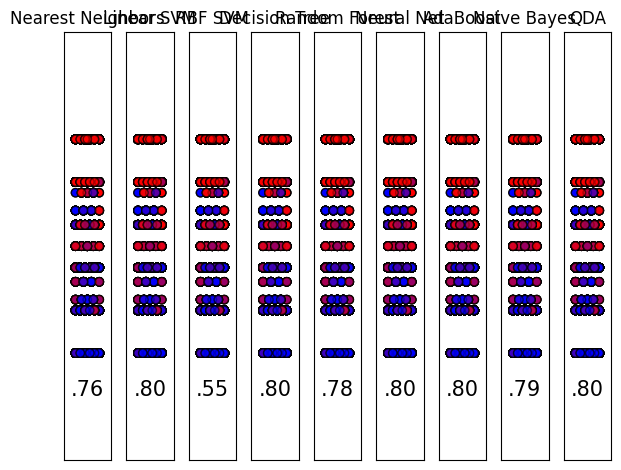

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    # "Gaussian Process",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    # GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),

]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    "ok"
]
df = pd.read_csv("csv/sql/processed.csv", dtype= {'teamid': 'str'})
blue_side = df[df["side"] == 100]
blue_side = blue_side.rename(columns={
    "teamid": "blue_teamid",
})
blue_side.drop(columns=["side"], inplace=True)

red_side = df[df["side"] == 200]
red_side = red_side.rename(columns={
    "teamid": "red_teamid",
})
red_side.drop(columns=["side", "esportsgameid"], inplace=True)

df = blue_side.merge(red_side, on="platformgameid", suffixes=("_blue", "_red"))
df['winningteam'] = np.where(df['win_blue'] == 1, 100, 200)
df.drop(columns=["win_blue", "win_red"], inplace=True)

df.fillna(0, inplace=True)
features = [
    "first_blood_avg",
    "first_inhibitor_avg",
    "first_tower_avg",
    "kills_avg",
    "win_avg",
    "deaths_avg",
    "level_avg",
    "cs_avg",
]
X = df[[i+"_blue" for i in features] + [i+"_red" for i in features ]]
y = df["winningteam"]

i = 1
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5

    # # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    # ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # if ds_cnt == 0:
    #     ax.set_title("Input data")
    # # Plot the training points
    # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # # Plot the testing points
    # ax.scatter(
    #     X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    # )
    # ax.set_xlim(x_min, x_max)
    # ax.set_ylim(y_min, y_max)
    # ax.set_xticks(())
    # ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(name, score)
        # DecisionBoundaryDisplay.from_estimator(
        #     clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        # )

        # Plot the training points
        ax.scatter(
            X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test.iloc[:, 0],
            X_test.iloc[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()